In [40]:
#this loads the dataset - Gueron book uses a different approach that
#uses a smaller version of mnist
#from sklearn.datasets import load_digits 
from sklearn.datasets import fetch_openml

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

mnist = fetch_openml("mnist_784", version = 1)

In [69]:
type(mnist)

sklearn.utils._bunch.Bunch

In [70]:
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [71]:
X,y = mnist['data'], mnist['target']

In [72]:
# notice it is 70.000 rows of 784 features 
# each 'feature' is a pixel in a 28x28 image
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [73]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
type(X)

pandas.core.frame.DataFrame

In [75]:
# book doesn't mention iloc but it is also deprecatede
# book fails to identify that dataset is a Pandas dataframe
# and needs to be treated as an array for reshaping
# so we turn it into a numpy array for speed
some_digit = X.loc[0].to_numpy()

In [76]:
some_digit_image = some_digit.reshape(28,28)

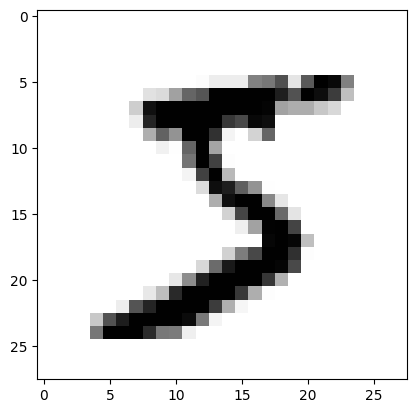

In [77]:
plt.imshow(some_digit_image, cmap="binary")

In [83]:
#whi is all the labels and you can see the label is 5
y[0]

5

In [87]:
#book says Python thinks y is a string array
#but this is questionable as on my machine it's an int
#this is why statically typed langauges are sooooo good in comparison
type(y[0])

numpy.uint8

In [88]:
#ensure labels are integers not strings
y = y.astype(np.uint8)

In [89]:
type(y[6])

numpy.uint8

In [91]:
#do another one to check
y[6]

1

In [92]:
some_digit = X.loc[6].to_numpy()

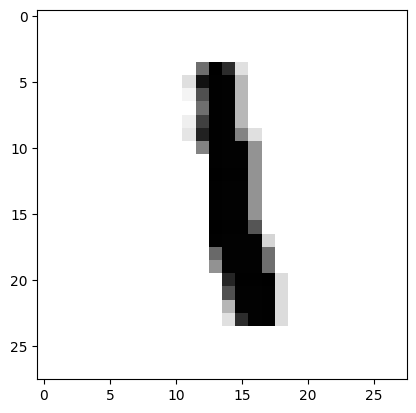

In [93]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")

In [142]:
#this version of the MNIST data is already split and
#shuffled

X_train, X_test = X[:60000], X[:60000]

In [143]:
y_train, y_test = y[:60000], y[:60000]

In [144]:
#Can now apply a model - gradient descent is popular for this sort of classification problem
#Gradient descent is in simple terms to try and find the fewest steps to achieve the most effect
#it finds the lowest weights to apply to get the optimum solution
#think of it like going down a hill - if it's steep you get to the bottom quicker 
#(you 'learn' faster) - the book uses Stochastic gradient descent - it starts at a random spot
#wiggles its way to a solution

y_train5 = (y_train == 5)

In [145]:
y_test5 = (y_test == 5)

In [146]:
from sklearn.linear_model import SGDClassifier

In [167]:
#play around with different starting points for the
#classifier

sgd_clf = SGDClassifier(random_state = 41)

In [168]:
sgd_clf.fit(X_train, y_train5)

SGDClassifier(random_state=41)

In [169]:
some_digit = X.loc[0].to_numpy()

In [166]:
sgd_clf.predict([some_digit])

/opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
cross_val_score(sgd_clf, X_train, y_train5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [157]:
y_train1 = (y_train == 1)

In [158]:
y_test1 = (y_test == 1)

In [159]:
sgd_clf.fit(X_train, y_train1)

SGDClassifier(random_state=42)

In [160]:
some_digit = X.loc[6].to_numpy()

In [161]:
sgd_clf.predict([some_digit])

/opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [162]:
cross_val_score(sgd_clf, X_train, y_train1, cv = 3, scoring = 'accuracy')

array([0.9878 , 0.98095, 0.99005])

In [121]:
#note how the accuracy for a 1 is even higher than for the 5 - simpler shape
#but must be aware that accuracy is not a perfect measure

In [232]:
# Using BaseEstimator which is like a template for creating your
# own esitmators - the Never5 classifier is a custom estimator
# that uses the BaseEstimators inbuilt template

from sklearn.base import BaseEstimator

#book uses the pandas dataframe but needs converting 
#to an array for scikit learn to use it properly
num = X.to_numpy()

In [233]:
class Never5Classifier(BaseEstimator):
    def fit(self,num, y=None):
        return self
    def predict(self,num):
        return np.zeros((len(num), 1),dtype =bool)

In [234]:
#create a new Never5Classifier object
never_5_clf = Never5Classifier()


In [235]:
cross_val_score(never_5_clf, X_train, y_train5, cv=3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

In [237]:
# notice this very basic !=5 classifier still has over 90% prediction
# which indicates that accuracy is not the ideal measure as it ignores
# false positives and false negatives



In [239]:
#This can be used to produce a set of cross-folded predictions
#it returns a prediction rather than an evaluation of prediciton versus
#actuality - it nevers sees the training data
from sklearn.model_selection import cross_val_predict

sgd_clf.fit(X_train, y_train5)



SGDClassifier(random_state=41)

In [240]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train5, cv=3)

In [241]:
from sklearn.metrics import confusion_matrix

In [242]:
confusion_matrix(y_train5, y_train_pred)

array([[53651,   928],
       [ 1636,  3785]])

In [243]:
# top left TRUE NEGATIVE
# top right FALSE NEGATIVE
# bottom left FALSE POSITIVE
# bottom right TRUE POSITIVE

# TN FP
# FN TP
#
# Keeping false returns to a minimum is essential to a well-performing model
# But perfect prediction indicates over-fitting and indicates the model will
# perform badly in the real world.

y_perf_predict = y_train5
confusion_matrix(y_train5, y_perf_predict)

array([[54579,     0],
       [    0,  5421]])

In [244]:
# the zeros on the diagonal indicate we are getting no false negatives 
# or positives with a perfect predictor - very unlikely in the real world

In [245]:
# This can be used to give a measure of 'precision' rather than 'accuracy'

In [248]:
# TP/(TP + FP) - so True Positives as a percentage of TPs AND FPs
# 3785/(3785 + 928) = 0.803

In [249]:
# Precision is useful for seeing how well positives are identified
# but sensitivity or recall shows how big a percentage of actual
# positives are found but seeing true positives as a % of ALL positives
# TPs + FN
#
# 3785/(3785 + 1636) = 0.698

# the two scores show that of all the results the 5 detector gets 80% correct
# it also shows that it gets them correct only about 70% of the time

# These figures are combined to produce the F score (f 1)
# This is done using the harmonic mean of the two numbers
# The harmonic mean is ike the arithmetic mean where the values are 
# are raised to the power of -1 (ie the reciprocal) and are divided into
# the number of items

# 2/(1/0.803) + (1/0.698) = 0.747


In [253]:
# sometimes you want more precision and sometimes more recall (sensitivity)
# increasing precison lowers recall and vice versa
# see pages 93 and 94 in ed 2 of Gueron book and explore F2 and F3 scores

In [255]:
y_scores = sgd_clf.decision_function([some_digit])

/opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [256]:
y_scores

array([4620.35894938])

In [264]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [265]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [266]:
# by changing the threshold we increased precision but lowered recall

In [276]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train5, cv=3, method="decision_function")

In [277]:
from sklearn.metrics import precision_recall_curve

In [278]:

precision_recall_curve(y_train5, y_scores)

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-139720.58587196, -129096.15666832, -128841.56847393, ...,
          27211.76158727,   27991.14442752,   28129.80752148]))

In [281]:
threshold = -128846
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [254]:
# The ROC (receiver operating characteristic) curve plots true positives against false positive 

from sklearn.metrics import roc_curve

In [282]:
fpr, tpr, thresholds = roc_curve(y_train5, y_scores)

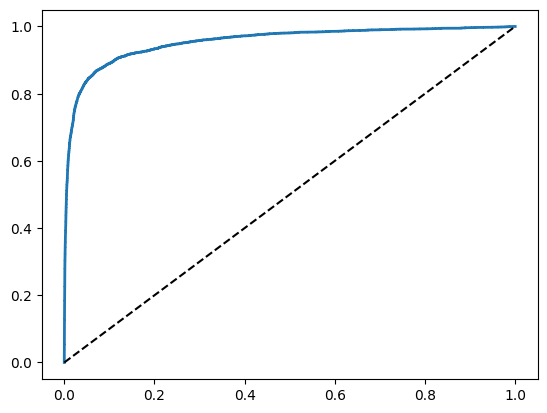

In [287]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(tpr, fpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(tpr,fpr)
plt.show()

In [288]:
# can get a measure of how good this plot is by measuring the area under the curve
# total coverage is 1 so we want a numbe rlower than but close to 1

In [289]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train5, y_scores)

0.9548657434867129